In [5]:
# !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-probability

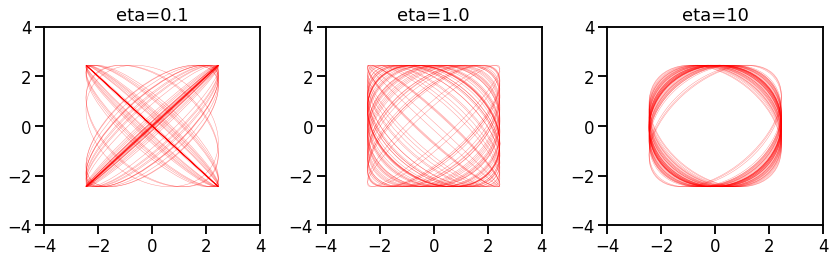

In [2]:
%matplotlib inline
from matplotlib.patches import Ellipse
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import tensorflow as tf
import tensorflow_probability as tfp
sns.set_context('talk')


# draw 95% confidence interval of multivariate normal distribution
def draw_ellipse(cov, ax):
    var, U = np.linalg.eig(cov)
    angle = 180. / np.pi * np.arctan(U[0, 0]/ U[1, 0])

    e = Ellipse(np.zeros(2), 2 * np.sqrt(5.991 * var[0]), 2 * np.sqrt(5.991 * var[1]), 
                angle=angle, facecolor='none', edgecolor='r', linewidth=0.5, alpha=0.4)

    ax.add_artist(e)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    

# visualize samples from LKJ prior
def visualize_LKJ(eta, n_sample, ax):
    dist = tfp.distributions.LKJ(dimension=2, concentration=eta)
    sample = dist.sample(sample_shape=n_sample, seed=42)
    
    with tf.Session() as sess:
        cov_samples = sess.run(sample)
    
    for cov in cov_samples:
        draw_ellipse(cov, ax)
    ax.set_title(f'eta={eta}')


eta_list = [0.1, 1.0, 10]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, eta in enumerate(eta_list):
    visualize_LKJ(eta, 50, axes[i])
plt.tight_layout()
# plt.savefig('LKJ_sample.png')

In [167]:
import tensorflow as tf
import tensorflow_probability as tfp

# Pretend to load synthetic data set.
features = tfp.distributions.Normal(loc=0., scale=1.).sample(int(100e3))
labels = tfp.distributions.Bernoulli(logits=1.618 * features).sample()

# Specify model.
model = tfp.glm.Bernoulli()

# Fit model given data.
coeffs, linear_response, is_converged, num_iter = tfp.glm.fit(
    model_matrix=features[:, tf.newaxis],
    response=tf.cast(labels, dtype=tf.float32),
    model=model)
# ==> coeffs is approximately [1.618] (We're golden!)

In [168]:
tfp.__version__

'0.7.0'

In [169]:
# dist = tfp.distributions.LKJ(dimension=2, concentration=1.5, input_output_cholesky=True)
dist = tfp.distributions.LKJ(dimension=2, concentration=1.0)

# Draw 6 LKJ-distributed 3x3 correlation matrices
ans = dist.sample(sample_shape=50, seed=42)

In [170]:
with tf.Session() as sess:
    res = sess.run(ans)

In [172]:
def draw_ellipse(cov, ax):
    var, U = np.linalg.eig(cov)
    angle = 180. / np.pi * np.arctan(U[0, 0]/ U[1, 0])

    e = Ellipse(np.zeros(2), 2 * np.sqrt(5.991 * var[0]), 2 * np.sqrt(5.991 * var[1]), 
                angle=angle, facecolor='none', edgecolor='r', linewidth=0.5, alpha=0.4)

    ax.add_artist(e)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    

def visualize_LKJ(eta, n_sample, ax):
    dist = tfp.distributions.LKJ(dimension=2, concentration=eta)
    sample = dist.sample(sample_shape=n_sample, seed=42)
    
    with tf.Session() as sess:
        cov_samples = sess.run(sample)
    
#     fig, ax = plt.subplots(figsize=(5, 4))
    for cov in cov_samples:
        draw_ellipse(cov, ax)
    ax.set_title(f'eta={eta}')

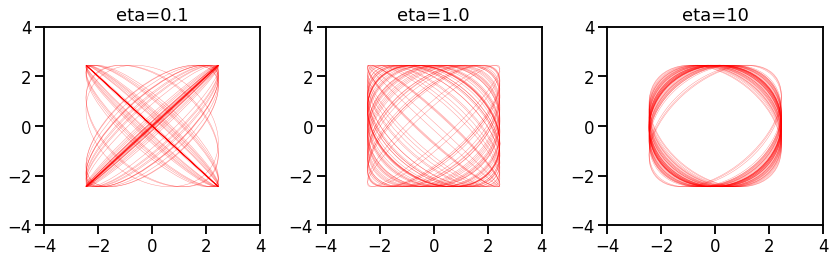

In [181]:
eta_list = [0.1, 1.0, 10]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, eta in enumerate(eta_list):
    visualize_LKJ(eta, 50, axes[i])
    
plt.tight_layout()
plt.savefig('LKJ_sample.png')

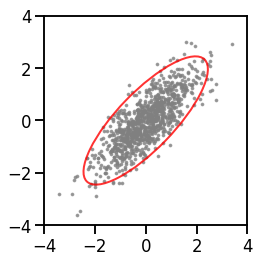

In [27]:
cov = np.array([[1.0, 0.8], [0.8, 1.0]])
var, U = np.linalg.eig(cov)
angle = 180. / np.pi * np.arctan(U[0, 0]/ U[1, 0])

np.random.seed(2)
x = np.random.multivariate_normal(np.zeros(2), cov, size=1000)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x[:,0], x[:,1], s=5, color='gray', alpha=0.7)

e = Ellipse(np.zeros(2), 2 * np.sqrt(5.991 * var[0]), 2 * np.sqrt(5.991 * var[1]), 
            angle=angle, facecolor='none', edgecolor='r', linewidth=2, alpha=0.8)
ax.add_artist(e)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

plt.tight_layout()
plt.savefig('mvnormal_sample.png')

In [29]:
dist = tfp.distributions.LKJ(dimension=2, concentration=1.5, input_output_cholesky=True)
# dist = tfp.distributions.LKJ(dimension=2, concentration=1.0)

# Draw 6 LKJ-distributed 3x3 correlation matrices
ans = dist.sample(sample_shape=50, seed=42)

with tf.Session() as sess:
    res = sess.run(ans)

In [36]:
#  コレスキー分解では下三角行列Lとその転置行列の積で共分散行列を表す。
res[0].dot(res[0].T)

array([[ 1.        , -0.61710215],
       [-0.61710215,  1.        ]], dtype=float32)

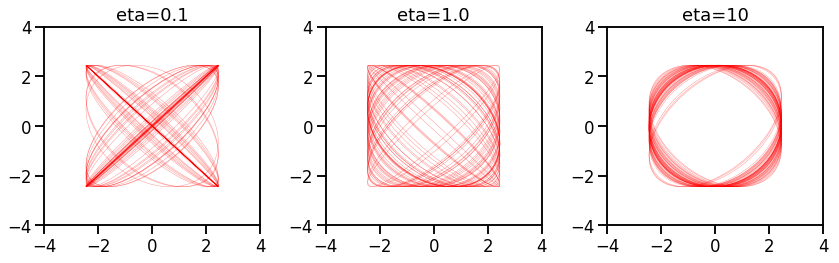

In [41]:
%matplotlib inline
from matplotlib.patches import Ellipse
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import tensorflow as tf
import tensorflow_probability as tfp
sns.set_context('talk')


# draw 95% confidence interval of multivariate normal distribution
def draw_ellipse(cov, ax):
    var, U = np.linalg.eig(cov)
    angle = 180. / np.pi * np.arctan(U[0, 0]/ U[1, 0])

    e = Ellipse(np.zeros(2), 2 * np.sqrt(5.991 * var[0]), 2 * np.sqrt(5.991 * var[1]), 
                angle=angle, facecolor='none', edgecolor='r', linewidth=0.5, alpha=0.4)

    ax.add_artist(e)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    

# visualize samples from LKJ prior
def visualize_LKJ(eta, n_sample, ax):
    dist = tfp.distributions.LKJ(dimension=2, concentration=eta, input_output_cholesky=True)
    sample = dist.sample(sample_shape=n_sample, seed=42)
    
    with tf.Session() as sess:
        cov_samples = sess.run(sample)
    
    for L in cov_samples:
        cov = L.dot(L.T)
        draw_ellipse(cov, ax)
    ax.set_title(f'eta={eta}')


eta_list = [0.1, 1.0, 10]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, eta in enumerate(eta_list):
    visualize_LKJ(eta, 50, axes[i])
plt.tight_layout()
# plt.savefig('LKJ_sample.png')

コレスキー分解した行列を用いた方が、計算が安定し速いため、普通はこちらを用いる。

Stanドキュメント  
実行速度が遅く、メモリ消費量が増え、数値上のエラーが発生する危険が高いコードを書きたいときに使うとのこと。
However, it is much better computationally to work directly with the Cholesky factor of  
Σ , so this distribution should never be explicitly used in practice.　　

The only reason to use this density function is if you want the code to run slower and consume more memory with more risk of numerical errors. Use its Cholesky factor as described in the next section.　　
　　
Σの逆行列を計算するのは数値的に不安定で、非効率的なのでLを用いる。
  
  
LKJ分布はあくまで相関行列の事前分布だが、各成分の標準偏差の事前分布と組み合わせることで、共分散行列の事前分布として使うことができる。   
これが一番明確のなのがPyMC3のLKJCholeskyCovクラスの実装で、sd_distという引数で標準偏差の事前分布を指定できる。  

https://docs.pymc.io/notebooks/LKJ.html  
こちらのページに使い方が書いているので、参照。

In [ ]:
# Wishart分布
tfp.distibutions.